In [11]:
# TensorFlow and tf.keras
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# CIFAR10 dataset - 28x28 colour images. 50,000 images for training. 10,000 for testing. 10 classes
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalise pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print('Train images: {}\tTrain lables: {}'.format(train_images.shape, len(train_labels)))
print('Test images: {}\tTest lables: {}'.format(test_images.shape, len(test_labels)))

Train images: (50000, 32, 32, 3)	Train lables: 50000
Test images: (10000, 32, 32, 3)	Test lables: 10000


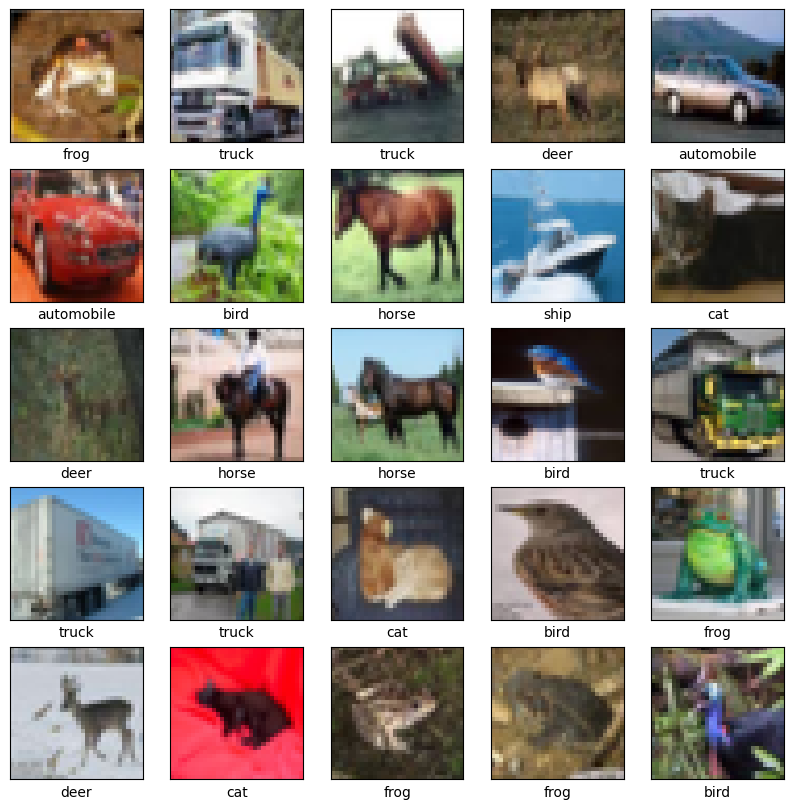

In [3]:
# Verify the data by plotting the first few images in the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(train_images[i])
    # The CIFAR labels are singular arrays, which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
# Build the convolutional neural network, specifying each of the layers
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(), # Backpropagation (algorithm for gradient descent)
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Loss function
              metrics=['accuracy']) # Fraction of images correctly classified

In [6]:
# Train the network
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 33s 20ms/step - loss: 1.5220 - accuracy: 0.4462 - val_loss: 1.2619 - val_accuracy: 0.5471
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1402 - accuracy: 0.5984 - val_loss: 1.0722 - val_accuracy: 0.6229
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9924 - accuracy: 0.6502 - val_loss: 1.0366 - val_accuracy: 0.6385
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8938 - accuracy: 0.6884 - val_loss: 0.9032 - val_accuracy: 0.6863
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8224 - accuracy: 0.7130 - val_loss: 0.8905 - val_accuracy: 0.6948
Epoch 6/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7691 - accuracy: 0.7288 - val_loss: 0.8854 - val_accuracy: 0.6930
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7157 - accuracy: 0.7490 - val_loss: 0.8776 -

313/313 - 1s - loss: 0.9008 - accuracy: 0.7093 - 1s/epoch - 4ms/step


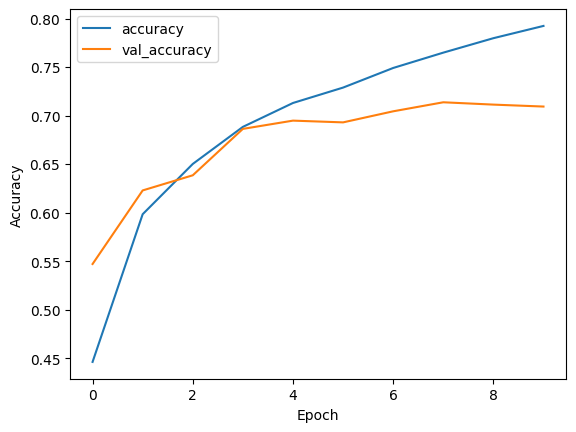

In [7]:
# Evaluating the network
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch'), plt.ylabel('Accuracy')
plt.legend()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [8]:
# Make predictions. Attach a softmax layer to convert the networks logits output to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
# Predict the label for each image in the test set
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [9]:
 def plot_image(predictions, label, img):
    plt.xticks([]), plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions)
    colour = 'blue' if predicted_label == label else 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions),
                                         class_names[label]),
                                         color=colour)

def plot_value_array(predictions, label):
    plt.xticks(range(10)), plt.yticks([])
    plot = plt.bar(range(10), predictions, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions)

    plot[predicted_label].set_color('red')
    plot[label].set_color('blue')

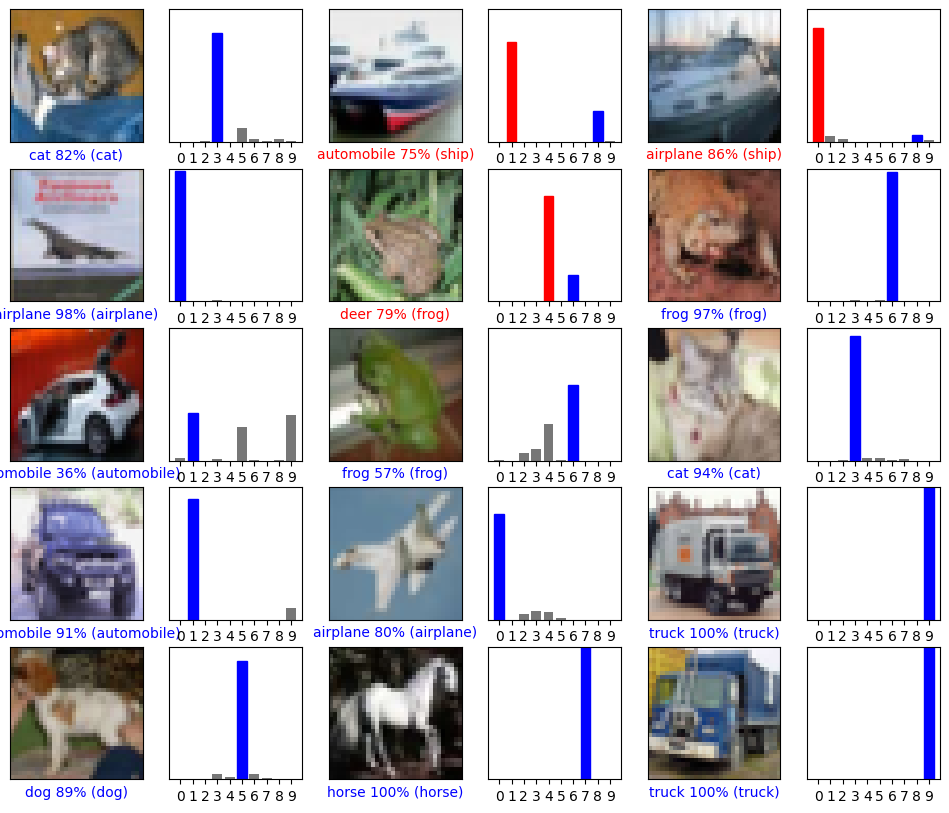

In [12]:
# Plot the first test images, their predicted labels, and the true labels
# Correct predictions are blue and incorrect predictions are red
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2 * i + 1)
    plot_image(predictions[i], test_labels[i][0], test_images[i])
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(predictions[i], test_labels[i][0])
plt.show()